Exercise 4

In [1]:
import numpy as np
import pandas as pd
import math 
from itertools import combinations_with_replacement
import matplotlib.pyplot as plt

#pricing of the european call
def price_eucall(k,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(g,g+1):#range has to be of one number
        
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        tau=t/n
        #print(tau)
        u=np.exp(sigma*math.sqrt(tau))
        print(u)
        print(math.sqrt(tau))
        print(tau)
        print(n)
        d=np.exp(-sigma*math.sqrt(tau))
        #print(u,d)
        l=[u,d]
        comb=list(combinations_with_replacement(l, n))
        for x in comb:
            #print(x)
            g=1
            for i in range(0,n):
                g=g*x[i]
            a.append(g)
        #print(len(a))
        for q in a:
            fin_val.append(q*s)
            fin_val_call.append(q*s-k)
        for x in range(len(fin_val_call)):
            if fin_val_call[x]<0:
                fin_val_call[x]=0
        #print(fin_val_call)
        #print(fin_val[0],fin_val[1])
        delta=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
        risk_neutral_prob=(1-d)/(u-d)
        #print(risk_neutral_prob)
        #print(delta)
        nn=n
        
       # print(nn)
        
        if n>=2:
            for j in range(0,n):
                call_int_val=fin_val_call[j]*risk_neutral_prob+(1-risk_neutral_prob)*fin_val_call[j+1]
                interm.append(call_int_val)
                #print(interm)
            nn=nn-1
            while nn>1: 
                for k in range(n-1):
                    interm[k]=interm[k]*risk_neutral_prob+(1-risk_neutral_prob)*interm[k+1]
                    #print(interm[k],nn)
                nn=nn-1
                #print(nn)
    
                    
            if nn==1:
                #print('ffffff')
                prezzo=interm[0]*risk_neutral_prob+(1-risk_neutral_prob)*interm[1]
                delta1=(interm[0]-interm[1])/(s*u-s*d)
                #print(delta)
               # print(interm[0],)
                #print('the price of the option at ',n,' steps is ',abs(prezzo))
                #interm=[]
                #print(interm,'fine')
                
                
        
        else :
            prezzo=fin_val[0]*delta-fin_val[0]*delta*d-fin_val_call[0]
            delta1=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
            #print(delta)
            #print('The price of the option at ',n,' steps is ',abs(prezzo))
                
    #return(abs(prezzo))


            
            
    

In [ ]:
price_eucall(10, 50000)

bs value is = 9.947653162539922


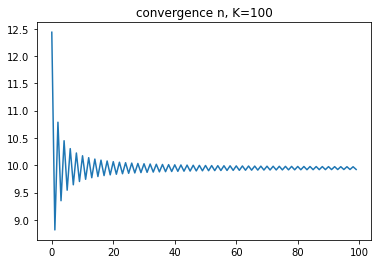

In [97]:
eucall_100=[]
for i in range(1,101):
    eucall_100.append(price_eucall(100,i))
df=pd.DataFrame(eucall_100)
plt.plot(df)
plt.title('convergence n, K=100')
print('bs value is = 9.947653162539922')


Text(0.5, 1.0, 'convergence n, K=110')

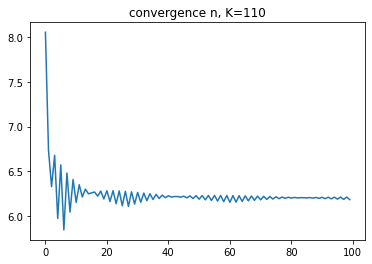

In [5]:
eucall_110=[]
for i in range(1,101):
    eucall_110.append(price_eucall(110,i))
df1=pd.DataFrame(eucall_110)
plt.plot(df1)
plt.title('convergence n, K=110')
print('bs value is = 6.1904328871611725')


bs value is = 15.272066431660711


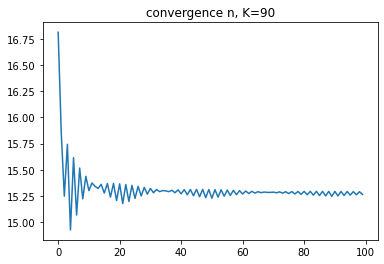

In [98]:
eucall_90=[]
for i in range(1,101):
    eucall_90.append(price_eucall(90,i))
df2=pd.DataFrame(eucall_90)
plt.plot(df2)
plt.title('convergence n, K=90')
print('bs value is = 15.272066431660711')


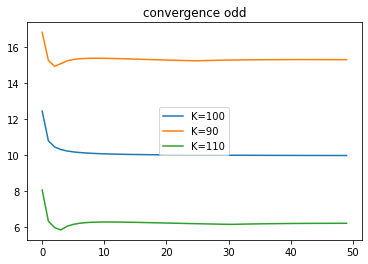

In [7]:
eucall_odd=[]
for i in range(1,101,2):
    eucall_odd.append(price_eucall(100,i))
df3=pd.DataFrame(eucall_odd)
plt.plot(df3,label='K=100')
plt.title('convergence 2n')

eucall_odd1=[]
for i in range(1,101,2):
    eucall_odd1.append(price_eucall(90,i))
df00=pd.DataFrame(eucall_odd1)
plt.plot(df00,label='K=90')
plt.title('convergence 2n')

eucall_odd2=[]
for i in range(1,101,2):
    eucall_odd2.append(price_eucall(110,i))
df01=pd.DataFrame(eucall_odd2)
plt.plot(df01, label='K=110')
plt.title('convergence odd')
plt.legend(loc='center')

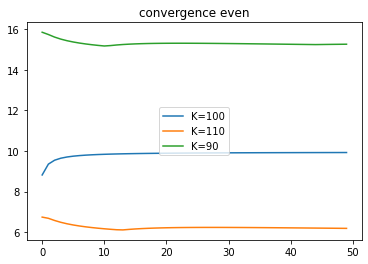

In [8]:
eucall_even=[]
for i in range(2,101,2):
    eucall_even.append(price_eucall(100,i))
df4=pd.DataFrame(eucall_even)
plt.plot(df4, label='K=100')
plt.title('convergence 2n+1')
plt.legend(loc='center')
eucall_even1=[]
for i in range(2,101,2):
    eucall_even1.append(price_eucall(110,i))
df111=pd.DataFrame(eucall_even1)
plt.plot(df111, label='K=110')
plt.title('convergence 2n+1')
plt.legend(loc='center')
eucall_even2=[]
for i in range(2,101,2):
    eucall_even2.append(price_eucall(90,i))
df44=pd.DataFrame(eucall_even2)
plt.plot(df44, label='K=90')
plt.title('convergence even')
plt.legend(loc='center')

In [9]:
import numpy as np
import pandas as pd
import math 
from itertools import combinations_with_replacement
#calculate delta 
def delta_call(k,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(g,g+1):#range has to be of one number
        
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        tau=t/n
        #print(tau)
        u=np.exp(sigma*math.sqrt(tau))
        d=np.exp(-sigma*math.sqrt(tau))
        #print(u,d)
        l=[u,d]
        comb=list(combinations_with_replacement(l, n))
        for x in comb:
            #print(x)
            g=1
            for i in range(0,n):
                g=g*x[i]
            a.append(g)
        #print(len(a))
        for q in a:
            fin_val.append(q*s)
            fin_val_call.append(q*s-k)
        for x in range(len(fin_val_call)):
            if fin_val_call[x]<0:
                fin_val_call[x]=0
        #print(fin_val_call)
        #print(fin_val[0],fin_val[1])
        delta=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
        risk_neutral_prob=(1-d)/(u-d)
        #print(risk_neutral_prob)
        #print(delta)
        nn=n
        
       # print(nn)
        
        if n>=2:
            for j in range(0,n):
                call_int_val=fin_val_call[j]*risk_neutral_prob+(1-risk_neutral_prob)*fin_val_call[j+1]
                interm.append(call_int_val)
                #print(interm)
            nn=nn-1
            while nn>1: 
                for k in range(n-1):
                    interm[k]=interm[k]*risk_neutral_prob+(1-risk_neutral_prob)*interm[k+1]
                    
                    #print(interm[k],nn)
                nn=nn-1
                #print(nn)
    
                    
            if nn==1:
                #print('ffffff')
                prezzo=interm[0]*risk_neutral_prob+(1-risk_neutral_prob)*interm[1]
                delta1=(interm[0]-interm[1])/(s*u-s*d)
                #print(delta)
               # print(interm[0],)
                #print('the price of the option at ',n,' steps is ',abs(prezzo))
                #interm=[]
                #print(interm,'fine')
                
                
        
        else :
            prezzo=fin_val[0]*delta-fin_val[0]*delta*d-fin_val_call[0]
            delta1=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
            #print(delta)
            #print('The price of the option at ',n,' steps is ',abs(prezzo))
                
    return((delta1))


Text(0.5, 1.0, 'delta, K=100')

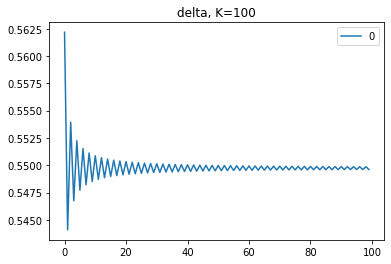

In [10]:
deltacall_100=[]
for i in range(1,101):
    deltacall_100.append(delta_call(100,i))
df5=pd.DataFrame(deltacall_100)
df5.plot()
plt.title('delta, K=100')


Text(0.5, 1.0, 'delta, K=110')

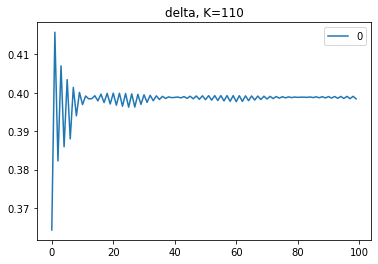

In [11]:
deltacall_110=[]
for i in range(1,101):
    deltacall_110.append(delta_call(110,i))
df6=pd.DataFrame(deltacall_110)
df6.plot()
plt.title('delta, K=110')

Text(0.5, 1.0, 'delta, K=90')

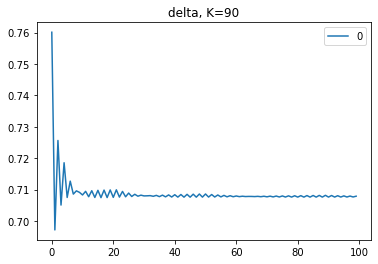

In [12]:
deltacall_90=[]
for i in range(1,101):
    deltacall_90.append(delta_call(90,i))
df7=pd.DataFrame(deltacall_90)
df7.plot()
plt.title('delta, K=90')

Text(0.5, 1.0, 'delta odd, K=100')

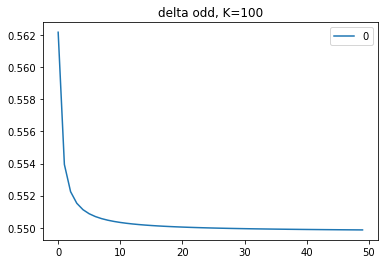

In [13]:
deltacall_odd=[]
for i in range(1,101,2):
    deltacall_odd.append(delta_call(100,i))
df8=pd.DataFrame(deltacall_odd)
df8.plot()
plt.title('delta odd, K=100')

Text(0.5, 1.0, 'delta odd, K=110')

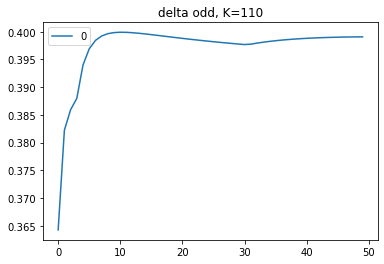

In [14]:
deltacall_odd1=[]
for i in range(1,101,2):
    deltacall_odd1.append(delta_call(110,i))
df09=pd.DataFrame(deltacall_odd1)
df09.plot()
plt.title('delta odd, K=110')

Text(0.5, 1.0, 'delta odd, K=90')

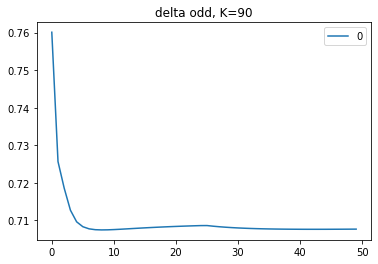

In [15]:
deltacall_odd3=[]
for i in range(1,101,2):
    deltacall_odd3.append(delta_call(90,i))
df800=pd.DataFrame(deltacall_odd3)
df800.plot()
plt.title('delta odd, K=90')

Text(0.5, 1.0, 'Delta even, K=100')

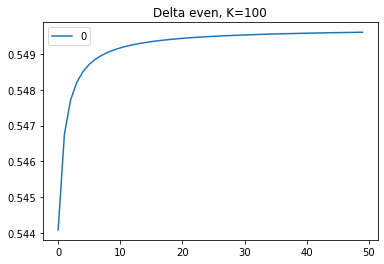

In [16]:
deltacall_even=[]
for i in range(2,101,2):
    deltacall_even.append(delta_call(100,i))
df9=pd.DataFrame(deltacall_even)
df9.plot()
plt.title('Delta even, K=100')

Text(0.5, 1.0, 'Delta even, K=110')

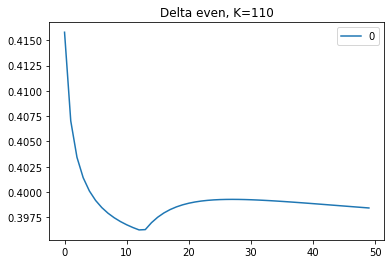

In [17]:
deltacall_even1=[]
for i in range(2,101,2):
    deltacall_even1.append(delta_call(110,i))
df900=pd.DataFrame(deltacall_even1)
df900.plot()
plt.title('Delta even, K=110')

Text(0.5, 1.0, 'Delat even, K=90')

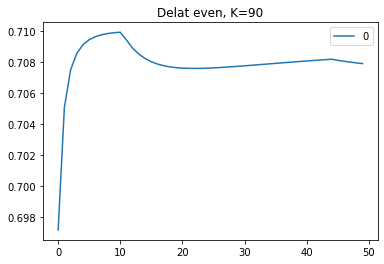

In [18]:
deltacall_even0=[]
for i in range(2,101,2):
    deltacall_even0.append(delta_call(90,i))
df90=pd.DataFrame(deltacall_even0)
df90.plot()
plt.title('Delat even, K=90')

In [19]:
def gamma_call(k,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(g,g+1):#range has to be of one number
        
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        tau=t/n
        #print(tau)
        u=np.exp(sigma*math.sqrt(tau))
        d=np.exp(-sigma*math.sqrt(tau))
        #print(u,d)
        l=[u,d]
        comb=list(combinations_with_replacement(l, n))
        for x in comb:
            #print(x)
            g=1
            for i in range(0,n):
                g=g*x[i]
            a.append(g)
        #print(len(a))
        for q in a:
            fin_val.append(q*s)
            fin_val_call.append(q*s-k)
        for x in range(len(fin_val_call)):
            if fin_val_call[x]<0:
                fin_val_call[x]=0
        #print(fin_val_call)
        #print(fin_val[0]/(u*u*u),fin_val[1]/(u*u*u), fin_val[2]/(u*u*u))
        delta=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
        risk_neutral_prob=(1-d)/(u-d)
        #print(risk_neutral_prob)
        #print(delta)
        nn=n
        deltau=[]
        deltad=[]
        #print(delta11)
        listee=[]
        #print(s*u*u,s*d*u,s*d*d)

        # print(nn)
        if n==2:
            deltau.append((fin_val_call[0]-fin_val_call[1])/(s*u*u-s*d*u))
            deltad.append((fin_val_call[1]-fin_val_call[2])/(s*d*u-s*d*d))
            #print(22222)
        
            
            
        if n>2:
            for j in range(0,n):
                call_int_val=fin_val_call[j]*risk_neutral_prob+(1-risk_neutral_prob)*fin_val_call[j+1]
                interm.append(call_int_val)
            deltau.append((interm[0]-interm[1])/(s*u*u-s*d*u))
            deltad.append((interm[1]-interm[2])/(s*u*d-s*d*d))
            #print(interm,"ggg")
            nn=nn-1
            while nn>=3: 
                for k in range(nn):
                    #print(nn)
                    #print(interm[k], interm[k+1])
                    interm[k]=interm[k]*risk_neutral_prob+(1-risk_neutral_prob)*interm[k+1]
                    #print(interm[k],"jjjjj")
                    listee.append(interm[k])
                
                nn=nn-1
                
                    
                #print(listee)
                #print(listee[-3])
                #print(s*u*u,s*d*u,s*d*d)
                deltau.append((listee[-3]-listee[-2])/(s*u*u-s*d*u))
                    
                deltad.append((listee[-2]-listee[-1])/(s*u*d-s*d*d))
                    #print(interm[k], interm[k+1])
        
                    #nn=nn-1
                    
            
                
                
        
        else :
            prezzo=fin_val[0]*delta-fin_val[0]*delta*d-fin_val_call[0]
            delta1=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
            #print(delta)
            #print('The price of the option at ',n,' steps is ',abs(prezzo))
        #deltau[-1]
        #deltad[-1]
        gamma=(deltau[-1]-deltad[-1])/(s*u-s*d)
        
    return((gamma))


Text(0.5, 1.0, 'Gamma, K=100')

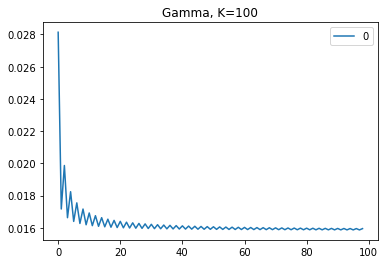

In [20]:
gammacall_100=[]
for i in range(2,101):
    gammacall_100.append(gamma_call(100,i))
df31=pd.DataFrame(gammacall_100)
df31.plot()
plt.title('Gamma, K=100')

Text(0.5, 1.0, 'Gamma, K=110')

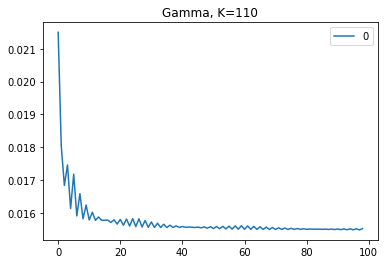

In [21]:
gammacall_110=[]
for i in range(2,101):
    gammacall_110.append(gamma_call(110,i))
df32=pd.DataFrame(gammacall_110)
df32.plot()
plt.title('Gamma, K=110')

Text(0.5, 1.0, 'Gamma, K=90')

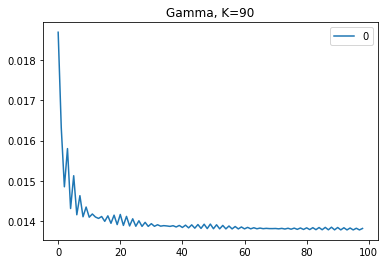

In [22]:
gammacall_90=[]
for i in range(2,101):
    gammacall_90.append(gamma_call(90,i))
df30=pd.DataFrame(gammacall_90)
df30.plot()
plt.title('Gamma, K=90')

Text(0.5, 1.0, 'Gamma,odd, K=100')

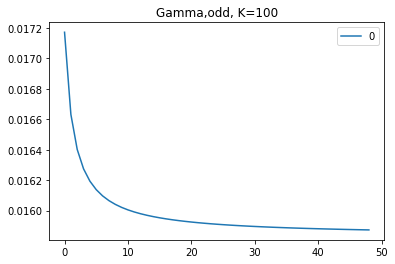

In [23]:
gammacall_odd=[]
for i in range(3,101,2):
    gammacall_odd.append(gamma_call(100,i))
df33=pd.DataFrame(gammacall_odd)
df33.plot()
plt.title('Gamma,odd, K=100')

Text(0.5, 1.0, 'Gamma,odd, K=110')

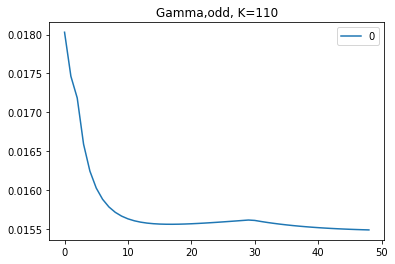

In [24]:
gammacall_odd1=[]
for i in range(3,101,2):
    gammacall_odd1.append(gamma_call(110,i))
df339=pd.DataFrame(gammacall_odd1)
df339.plot()
plt.title('Gamma,odd, K=110')

Text(0.5, 1.0, 'Gamma,odd, K=90')

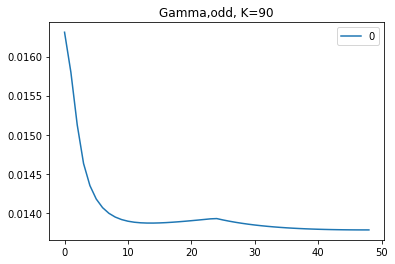

In [25]:
gammacall_odd2=[]
for i in range(3,101,2):
    gammacall_odd2.append(gamma_call(90,i))
df332=pd.DataFrame(gammacall_odd2)
df332.plot()
plt.title('Gamma,odd, K=90')

Text(0.5, 1.0, 'Gamma,even,K=100')

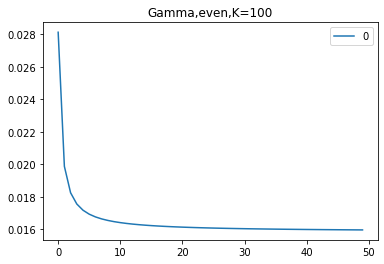

In [26]:
gammacall_even=[]
for i in range(2,101,2):
    gammacall_even.append(gamma_call(100,i))
df34=pd.DataFrame(gammacall_even)
df34.plot()
plt.title('Gamma,even,K=100')

Text(0.5, 1.0, 'Gamma,even,K=110')

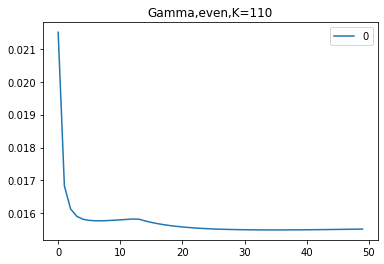

In [27]:
gammacall_even1=[]
for i in range(2,101,2):
    gammacall_even1.append(gamma_call(110,i))
df342=pd.DataFrame(gammacall_even1)
df342.plot()
plt.title('Gamma,even,K=110')

Text(0.5, 1.0, 'Gamma,even,K=90')

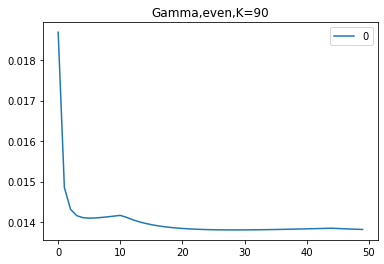

In [28]:
gammacall_even2=[]
for i in range(2,101,2):
    gammacall_even2.append(gamma_call(90,i))
df340=pd.DataFrame(gammacall_even2)
df340.plot()
plt.title('Gamma,even,K=90')

In [29]:
#pricing european put
def price_euput(k,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(g,g+1): #range has to be of one number
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        tau=t/n
        u=np.exp(sigma*math.sqrt(tau))
        d=np.exp(-sigma*math.sqrt(tau))
        #print(u,d)
        l=[u,d]
        comb=list(combinations_with_replacement(l, n))
        for x in comb:
            #print(x)
            g=1
            for i in range(0,n):
                g=g*x[i]
            a.append(g)
        #print(len(a))
        for q in a:
            fin_val.append(q*s)
            fin_val_call.append(k-q*s)
        for x in range(len(fin_val_call)):
            if fin_val_call[x]<0:
                fin_val_call[x]=0
        #print(fin_val_call)
        #print(fin_val)
        delta=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
        risk_neutral_prob=(1-d)/(u-d)
        #print(risk_neutral_prob)
        #print(delta)
        nn=n
        
       # print(nn)
        
        if n>=2:
            for j in range(0,n):
                call_int_val=fin_val_call[j]*risk_neutral_prob+(1-risk_neutral_prob)*fin_val_call[j+1]
                interm.append(call_int_val)
                #print(interm)
            nn=nn-1
            while nn>1: 
                for k in range(n-1):
                    interm[k]=interm[k]*risk_neutral_prob+(1-risk_neutral_prob)*interm[k+1]
                    #print(interm[k],nn)
                nn=nn-1
                #print(nn)
    
                    
            if nn==1:
                #print('ffffff')
                prezzo=interm[0]*risk_neutral_prob+(1-risk_neutral_prob)*interm[1]
               # print(interm[0],)
                #print('the price of the option at ',n,' steps is ',abs(prezzo))
                #interm=[]
                #print(interm,'fine')
                
                
        
        else :
            prezzo=fin_val[0]*delta-fin_val[0]*delta*d-fin_val_call[0]
            #print('The price of the option at ',n,' steps is ',abs(prezzo))
                
    return(abs(prezzo))

bs value is = 9.947653162539922


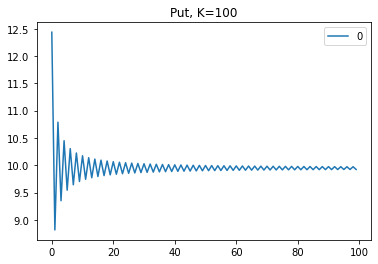

In [100]:
euput_100=[]
for i in range(1,101):
    euput_100.append(price_euput(100,i))
df10=pd.DataFrame(euput_100)
df10.plot()
plt.title('Put, K=100')
print('bs value is = 9.947653162539922')


bs value is = 16.19043288716118


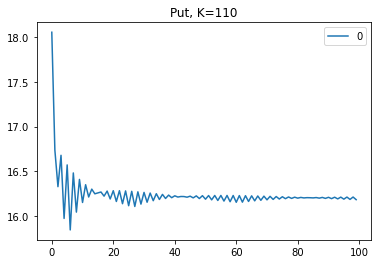

In [99]:
euput_110=[]
for i in range(1,101):
    euput_110.append(price_euput(110,i))
df11=pd.DataFrame(euput_110)
df11.plot()
plt.title('Put, K=110')
print('bs value is = 16.19043288716118')


bs value is = 5.272066431660711


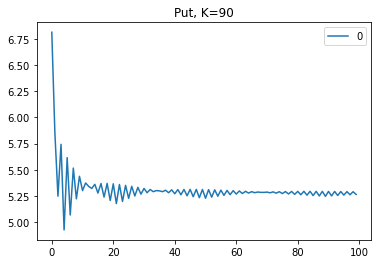

In [101]:
euput_90=[]
for i in range(1,101):
    euput_90.append(price_euput(90,i))
df12=pd.DataFrame(euput_90)
df12.plot()
plt.title('Put, K=90')
print('bs value is = 5.272066431660711')


Text(0.5, 1.0, 'Put, odd, K=100')

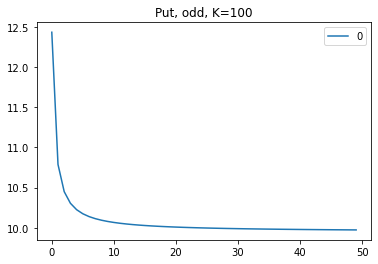

In [33]:
euput_odd=[]
for i in range(1,101,2):
    euput_odd.append(price_euput(100,i))
df13=pd.DataFrame(euput_odd)
df13.plot()
plt.title('Put, odd, K=100')


Text(0.5, 1.0, 'Put, 2n, K=110')

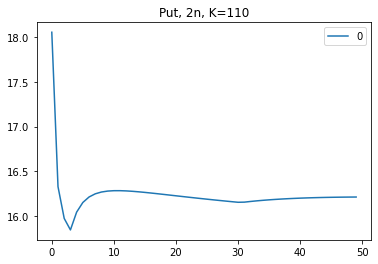

In [34]:
euput_odd1=[]
for i in range(1,101,2):
    euput_odd1.append(price_euput(110,i))
df131=pd.DataFrame(euput_odd1)
df131.plot()
plt.title('Put, 2n, K=110')


Text(0.5, 1.0, 'Put, odd, K=90')

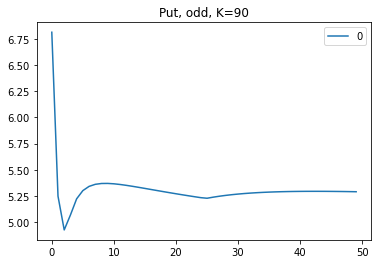

In [35]:
euput_odd2=[]
for i in range(1,101,2):
    euput_odd2.append(price_euput(90,i))
df132=pd.DataFrame(euput_odd2)
df132.plot()
plt.title('Put, odd, K=90')


Text(0.5, 1.0, 'Put, even, K=100')

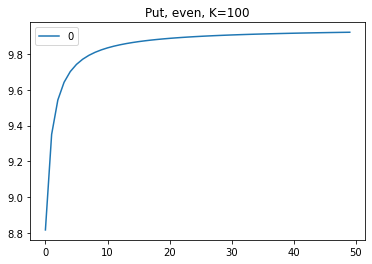

In [36]:
euput_even=[]
for i in range(2,101,2):
    euput_even.append(price_euput(100,i))
df14=pd.DataFrame(euput_even)
df14.plot()
plt.title('Put, even, K=100')

Text(0.5, 1.0, 'Put, even, K=110')

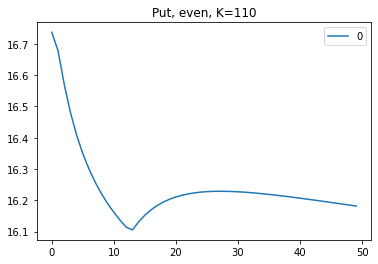

In [37]:
euput_even1=[]
for i in range(2,101,2):
    euput_even1.append(price_euput(110,i))
df141=pd.DataFrame(euput_even1)
df141.plot()
plt.title('Put, even, K=110')

Text(0.5, 1.0, 'Put, even, K=90')

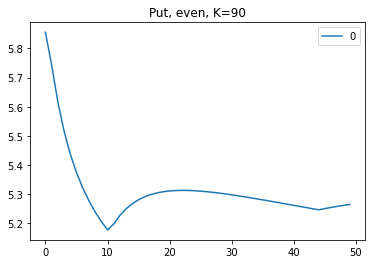

In [38]:
euput_even6=[]
for i in range(2,101,2):
    euput_even6.append(price_euput(90,i))
df146=pd.DataFrame(euput_even6)
df146.plot()
plt.title('Put, even, K=90')

In [39]:
def delta_put(k,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(g,g+1):#range has to be of one number
        
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        tau=t/n
        #print(tau)
        u=np.exp(sigma*math.sqrt(tau))
        d=np.exp(-sigma*math.sqrt(tau))
        #print(u,d)
        l=[u,d]
        comb=list(combinations_with_replacement(l, n))
        for x in comb:
            #print(x)
            g=1
            for i in range(0,n):
                g=g*x[i]
            a.append(g)
        #print(len(a))
        for q in a:
            fin_val.append(q*s)
            fin_val_call.append(k-q*s)
        for x in range(len(fin_val_call)):
            if fin_val_call[x]<0:
                fin_val_call[x]=0
        #print(fin_val_call)
        #print(fin_val[0],fin_val[1])
        delta=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
        risk_neutral_prob=(1-d)/(u-d)
        #print(risk_neutral_prob)
        #print(delta)
        nn=n
        
       # print(nn)
        
        if n>=2:
            for j in range(0,n):
                call_int_val=fin_val_call[j]*risk_neutral_prob+(1-risk_neutral_prob)*fin_val_call[j+1]
                interm.append(call_int_val)
                #print(interm)
            nn=nn-1
            while nn>1: 
                for k in range(n-1):
                    interm[k]=interm[k]*risk_neutral_prob+(1-risk_neutral_prob)*interm[k+1]
                    #print(interm[k],nn)
                nn=nn-1
                #print(nn)
    
                    
            if nn==1:
                #print('ffffff')
                prezzo=interm[0]*risk_neutral_prob+(1-risk_neutral_prob)*interm[1]
                delta1=(interm[0]-interm[1])/(s*u-s*d)
                #print(delta)
               # print(interm[0],)
                #print('the price of the option at ',n,' steps is ',abs(prezzo))
                #interm=[]
                #print(interm,'fine')
                
                
        
        else :
            prezzo=fin_val[0]*delta-fin_val[0]*delta*d-fin_val_call[0]
            delta1=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
            #print(delta)
            #print('The price of the option at ',n,' steps is ',abs(prezzo))
                
    return(delta1)

Text(0.5, 1.0, 'delta Put, K=100')

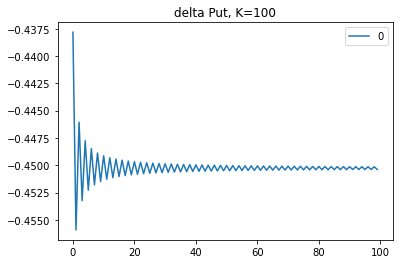

In [40]:
deltaput_100=[]
for i in range(1,101):
    deltaput_100.append(delta_put(100,i))
df15=pd.DataFrame(deltaput_100)
df15.plot()
plt.title('delta Put, K=100')

Text(0.5, 1.0, 'delta Put, K=110')

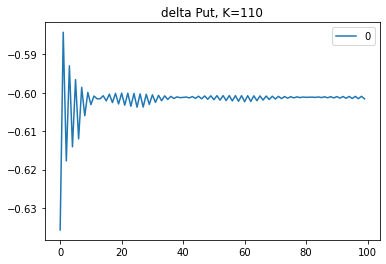

In [41]:
deltaput_110=[]
for i in range(1,101):
    deltaput_110.append(delta_put(110,i))
df16=pd.DataFrame(deltaput_110)
df16.plot()
plt.title('delta Put, K=110')

Text(0.5, 1.0, 'delta Put, K=90')

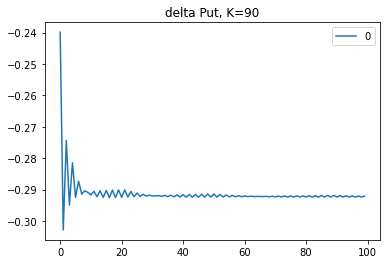

In [42]:
deltaput_90=[]
for i in range(1,101):
    deltaput_90.append(delta_put(90,i))
df17=pd.DataFrame(deltaput_90)
df17.plot()
plt.title('delta Put, K=90')

Text(0.5, 1.0, 'delta Put odd, K=100')

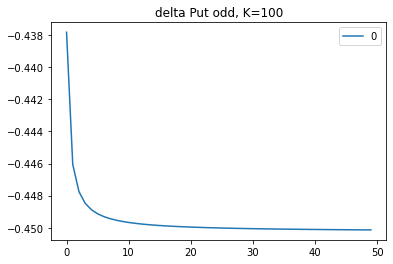

In [43]:
deltaput_odd=[]
for i in range(1,101,2):
    deltaput_odd.append(delta_put(100,i))
df18=pd.DataFrame(deltaput_odd)
df18.plot()
plt.title('delta Put odd, K=100')

Text(0.5, 1.0, 'delta Put,even K=100')

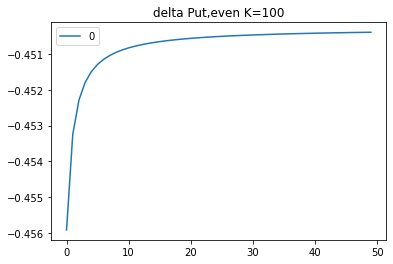

In [44]:
deltaput_even=[]
for i in range(2,101,2):
    deltaput_even.append(delta_put(100,i))
df19=pd.DataFrame(deltaput_even)
df19.plot()
plt.title('delta Put,even K=100')

In [45]:
def gamma_put(k,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(g,g+1):#range has to be of one number
        
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        tau=t/n
        #print(tau)
        u=np.exp(sigma*math.sqrt(tau))
        d=np.exp(-sigma*math.sqrt(tau))
        #print(u,d)
        l=[u,d]
        comb=list(combinations_with_replacement(l, n))
        for x in comb:
            #print(x)
            g=1
            for i in range(0,n):
                g=g*x[i]
            a.append(g)
        #print(len(a))
        for q in a:
            fin_val.append(q*s)
            fin_val_call.append(q*s-k)
        for x in range(len(fin_val_call)):
            if fin_val_call[x]<0:
                fin_val_call[x]=0
        #print(fin_val_call)
        #print(fin_val[0]/(u*u*u),fin_val[1]/(u*u*u), fin_val[2]/(u*u*u))
        delta=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
        risk_neutral_prob=(1-d)/(u-d)
        #print(risk_neutral_prob)
        #print(delta)
        nn=n
        deltau=[]
        deltad=[]
        #print(delta11)
        listee=[]
        #print(s*u*u,s*d*u,s*d*d)

        # print(nn)
        if n==2:
            deltau.append((fin_val_call[0]-fin_val_call[1])/(s*u*u-s*d*u))
            deltad.append((fin_val_call[1]-fin_val_call[2])/(s*d*u-s*d*d))
            #print(22222)
        
            
            
        if n>2:
            for j in range(0,n):
                call_int_val=fin_val_call[j]*risk_neutral_prob+(1-risk_neutral_prob)*fin_val_call[j+1]
                interm.append(call_int_val)
            deltau.append((interm[0]-interm[1])/(s*u*u-s*d*u))
            deltad.append((interm[1]-interm[2])/(s*u*d-s*d*d))
            #print(interm,"ggg")
            nn=nn-1
            while nn>=3: 
                for k in range(nn):
                    #print(nn)
                    #print(interm[k], interm[k+1])
                    interm[k]=interm[k]*risk_neutral_prob+(1-risk_neutral_prob)*interm[k+1]
                    #print(interm[k],"jjjjj")
                    listee.append(interm[k])
                
                nn=nn-1
                
                    
                #print(listee)
                #print(listee[-3])
                #print(s*u*u,s*d*u,s*d*d)
                deltau.append((listee[-3]-listee[-2])/(s*u*u-s*d*u))
                    
                deltad.append((listee[-2]-listee[-1])/(s*u*d-s*d*d))
                    #print(interm[k], interm[k+1])
        
                    #nn=nn-1
                    
            
                
                
        
        else :
            prezzo=fin_val[0]*delta-fin_val[0]*delta*d-fin_val_call[0]
            delta1=((fin_val_call[0]-fin_val_call[1])/(fin_val[0]-fin_val[1]))
            #print(delta)
            #print('The price of the option at ',n,' steps is ',abs(prezzo))
        #deltau[-1]
        #deltad[-1]
        gamma=(deltau[-1]-deltad[-1])/(s*u-s*d)
        
    return((-gamma))


Text(0.5, 1.0, 'Gamma Put, K=100')

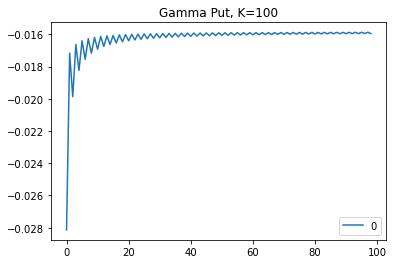

In [46]:
gammaput_100=[]
for i in range(2,101):
    gammaput_100.append(gamma_put(100,i))
df36=pd.DataFrame(gammaput_100)
df36.plot()
plt.title('Gamma Put, K=100')

Text(0.5, 1.0, 'gamma Put, K=90')

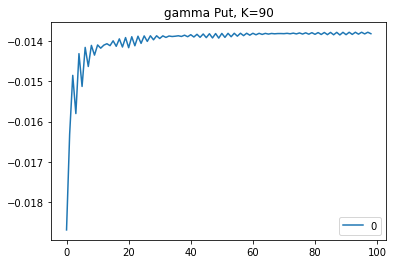

In [47]:
gammaput_90=[]
for i in range(2,101):
    gammaput_90.append(gamma_put(90,i))
df37=pd.DataFrame(gammaput_90)
df37.plot()
plt.title('gamma Put, K=90')

Text(0.5, 1.0, 'gamma Put, K=110')

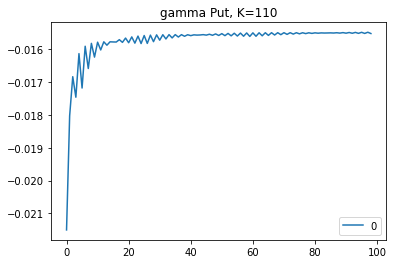

In [48]:
gammaput_110=[]
for i in range(2,101):
    gammaput_110.append(gamma_put(110,i))
df38=pd.DataFrame(gammaput_110)
df38.plot()
plt.title('gamma Put, K=110')

Text(0.5, 1.0, 'gamma Put, odd, K=100')

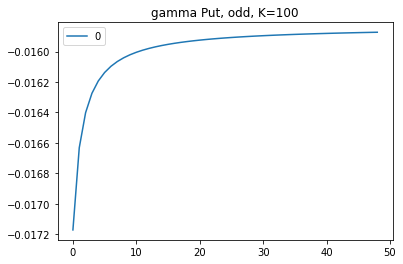

In [49]:
gammaput_odd=[]
for i in range(3,101,2):
    gammaput_odd.append(gamma_put(100,i))
df39=pd.DataFrame(gammaput_odd)
df39.plot()
plt.title('gamma Put, odd, K=100')

Text(0.5, 1.0, 'gamma Put, even K=100')

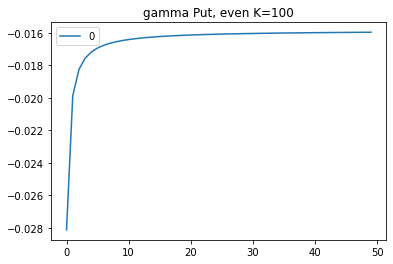

In [50]:
gammaput_even=[]
for i in range(2,101,2):
    gammaput_even.append(gamma_put(100,i))
df40=pd.DataFrame(gammaput_even)
df40.plot()
plt.title('gamma Put, even K=100')

Exercise 5

In [53]:
def price_eucall_trilam(K,x,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(1):#range has to be of one number
        
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        tau=t/g
        mu=r-(sigma**2)/2
        lam=x/(sigma*math.sqrt(tau))
        #x>sigma*np.sqrt(tau)
        #print(tau)
        S=np.zeros((g+1,2*g+1))
        V=np.zeros((g+1,2*g+1))
        S[0,0]=s
        for i in range(1,g+1):
            for k in range(0,2*i+1):
                if k==0:
                    S[i,k]=S[i-1,k]*np.exp(mu*tau+x)
                elif k==1:
                    S[i,k]=S[i-1,k-1]*np.exp(mu*tau)
                elif k==2:
                    S[i,k]=S[i-1,k-2]*np.exp(mu*tau-x)
                else:
                    S[i,k]=S[i-1,k-2]*np.exp(mu*tau-x)
        #print(S)
        #for i in range(1,g+1):
        for k in range(0,2*g+1):
            V[-1,k]=S[-1,k]-K
            if V[-1,k]<0:
                V[-1,k]=0
        #print(V)
      
        
        #print(fin_val)
        #q=((sigma**2)*tau)/(2*x**2)
        q=0.5/(lam**2)
        qm=1-2*q
        nn=g
        #print(q)
       # print(nn)
        for i in range (g):
            for k in range (2*(g-i)-1):
                V[g-i-1,k]=q*V[g-i,k]+qm*V[g-i,k+1]+q*V[g-i,k+2]
                
        #print(lam)
        
    return (V[0,0])           
    #return(abs(prezzo))


Text(0.5, 1.0, 'convergence n, lambda=1 K=90')

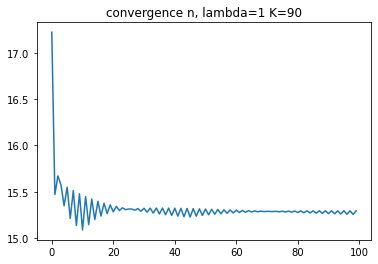

In [54]:
eucalltri_90=[]
for i in range(1,101):
    eucalltri_90.append(price_eucall_trilam(90,1*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_90)

plt.plot(df123)
plt.title('convergence n, lambda=1 K=90')


Text(0.5, 1.0, 'convergence n, lambda=1 K=100')

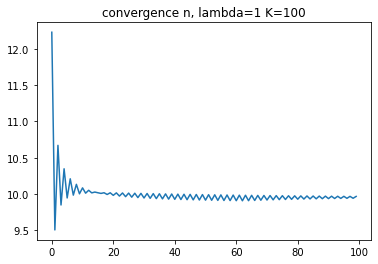

In [55]:
eucalltri_100=[]
for i in range(1,101):
    eucalltri_100.append(price_eucall_trilam(100,1*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_100)

plt.plot(df123)
plt.title('convergence n, lambda=1 K=100')


Text(0.5, 1.0, 'convergence n, lambda=1 K=110')

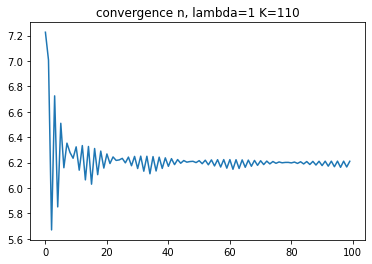

In [56]:
eucalltri_110=[]
for i in range(1,101):
    eucalltri_110.append(price_eucall_trilam(110,1*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_110)

plt.plot(df123)
plt.title('convergence n, lambda=1 K=110')


Text(0.5, 1.0, 'convergence n, lambda=1.1 K=90')

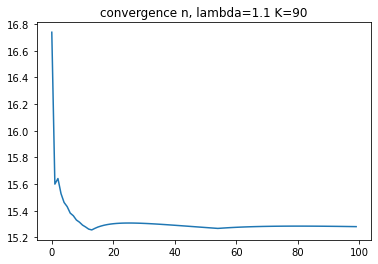

In [57]:
eucalltri_90=[]
for i in range(1,101):
    eucalltri_90.append(price_eucall_trilam(90,1.1*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_90)

plt.plot(df123)
plt.title('convergence n, lambda=1.1 K=90')


Text(0.5, 1.0, 'convergence n, lambda=1.1 K=100')

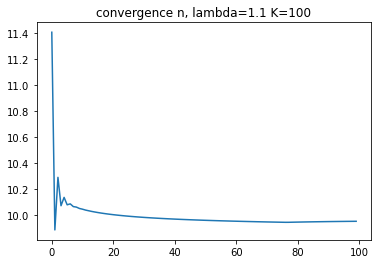

In [58]:
eucalltri_100=[]
for i in range(1,101):
    eucalltri_100.append(price_eucall_trilam(100,1.1*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_100)

plt.plot(df123)
plt.title('convergence n, lambda=1.1 K=100')


Text(0.5, 1.0, 'convergence n, lambda=1.1 K=110')

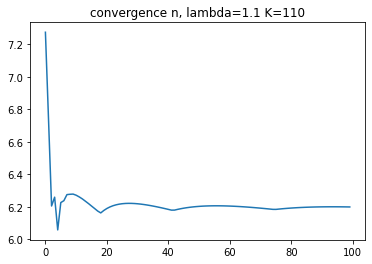

In [59]:
eucalltri_110=[]
for i in range(1,101):
    eucalltri_110.append(price_eucall_trilam(110,1.1*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_110)

plt.plot(df123)
plt.title('convergence n, lambda=1.1 K=110')


Text(0.5, 1.0, 'convergence n, lambda=1.5 K=90')

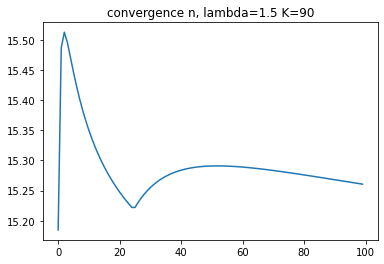

In [60]:
eucalltri_100=[]
for i in range(1,101):
    eucalltri_100.append(price_eucall_trilam(90,1.5*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_100)

plt.plot(df123)
plt.title('convergence n, lambda=1.5 K=90')


Text(0.5, 1.0, 'convergence n, lambda=1.5 K=100')

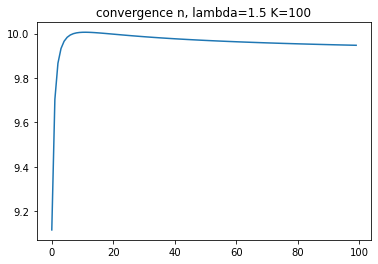

In [61]:
eucalltri_100=[]
for i in range(1,101):
    eucalltri_100.append(price_eucall_trilam(100,1.5*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_100)

plt.plot(df123)
plt.title('convergence n, lambda=1.5 K=100')


Text(0.5, 1.0, 'convergence n, lambda=1.5 K=110')

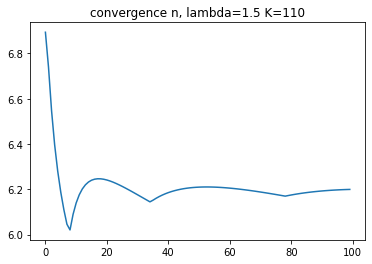

In [62]:
eucalltri_100=[]
for i in range(1,101):
    eucalltri_100.append(price_eucall_trilam(110,1.5*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_100)

plt.plot(df123)
plt.title('convergence n, lambda=1.5 K=110')


Text(0.5, 1.0, 'convergence n, lambda=0.9 K=90')

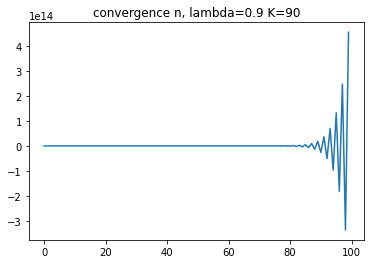

In [63]:
eucalltri_100=[]
for i in range(1,101):
    eucalltri_100.append(price_eucall_trilam(90,0.9*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_100)

plt.plot(df123)
plt.title('convergence n, lambda=0.9 K=90')


Text(0.5, 1.0, 'convergence n, lambda=0.9 K=100')

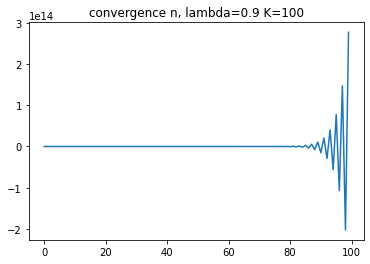

In [64]:
eucalltri_100=[]
for i in range(1,101):
    eucalltri_100.append(price_eucall_trilam(100,0.9*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_100)

plt.plot(df123)
plt.title('convergence n, lambda=0.9 K=100')


Text(0.5, 1.0, 'convergence n, lambda=0.9 K=110')

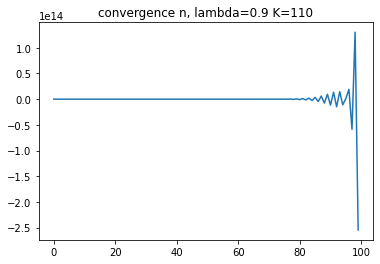

In [65]:
eucalltri_100=[]
for i in range(1,101):
    eucalltri_100.append(price_eucall_trilam(110,0.9*0.25*math.sqrt(1/i),i))
df123=pd.DataFrame(eucalltri_100)

plt.plot(df123)
plt.title('convergence n, lambda=0.9 K=110')


Looking at the Lambda that i have exprerienced i would say that the one going to the actual value fatser was Lambda=1.1, also  compared with the binomial model. At first I thought that there was a positive correlation between Lambda and accuracy so i tested the model for a bigger Lambda (1.5), this test proved gave me different results from the one expected as the BS price was reached after.
Testing a Lambda<1 we see that the model does not converge but actually spreads.
Also we proved that a trinomial model with Lambda=1 is a binomial model.

Exercise 6

In [67]:
def price_uscall(K,lam,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(1):#range has to be of one number
        
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        taue=t/g
        mu=r-(sigma**2)/2
        #x>sigma*np.sqrt(tau)
        #print(tau)
        S=np.zeros((g+1,2*g+1))
        V=np.zeros((g+1,2*g+1))
        S[0,0]=s
        for i in range(1,g+1):
            for k in range(0,2*i+1):
                if k==0:
                    S[i,k]=S[i-1,k]*np.exp(lam*sigma*np.sqrt(taue))
                    #print(S[i,k])
                elif k==1:
                    S[i,k]=S[i-1,k-1]*np.exp(0)
                elif k==2:
                    S[i,k]=S[i-1,k-2]*np.exp(-lam*sigma*np.sqrt(taue))
                else:
                    S[i,k]=S[i-1,k-2]*np.exp(-lam*sigma*np.sqrt(taue))
        #print(S)
        #for i in range(1,g+1):
        for k in range(0,2*g+1):
            V[-1,k]=S[-1,k]-K
            if V[-1,k]<0:
                V[-1,k]=0
        #print(V)
      
        
        #print(fin_val)
        qu=(1/(2*(lam**2)))+((r-0.5*sigma**2)/(2*lam*sigma)*np.sqrt(taue))
        qd=(1/(2*(lam**2)))-((r-0.5*sigma**2)/(2*lam*sigma)*np.sqrt(taue))
        qm=1-(1/lam**2)
        nn=g
        #print(qu)
       # print(nn)
        for i in range (g):
            for k in range (2*(g-i)-1):
                V[g-i-1,k]=qu*V[g-i,k]+qm*V[g-i,k+1]+qd*V[g-i,k+2]
                if S[g-i-1,k]-K >V[g-i-1,k]:
                    V[g-i-1,k]=S[g-i-1,k]-K
                    
                
        #print(V)
        
    return (V[0,0])           
    #return(abs(prezzo))


In [68]:
price_uscall(70,1,100)

30.7126707351526

Text(0.5, 1.0, 'american call, lambda=1 K=70')

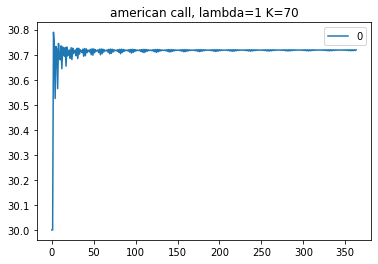

In [122]:
uscall_70=[]
for i in range(1,365):
    uscall_70.append(price_uscall(70,1,i))
df2021=pd.DataFrame(uscall_70)
df2021.plot()

plt.title('american call, lambda=1 K=70')

Text(0.5, 1.0, 'american call, lambda=1 K=80')

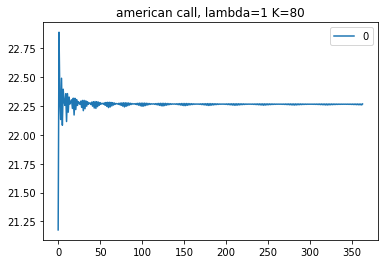

In [123]:
uscall_80=[]
for i in range(1,365):
    uscall_80.append(price_uscall(80,1,i))
df202=pd.DataFrame(uscall_80)
df202.plot()

plt.title('american call, lambda=1 K=80')

Text(0.5, 1.0, 'american call,lambda=1  K=100')

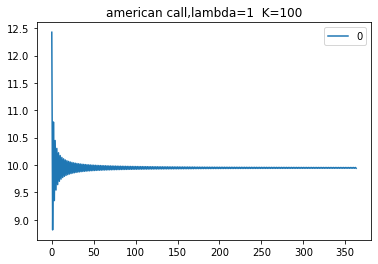

In [124]:
uscall_100=[]
for i in range(1,365):
    uscall_100.append(price_uscall(100,1,i))
df20=pd.DataFrame(uscall_100)
df20.plot()
plt.title('american call,lambda=1  K=100')

Text(0.5, 1.0, 'american call, lambda=1 K=110')

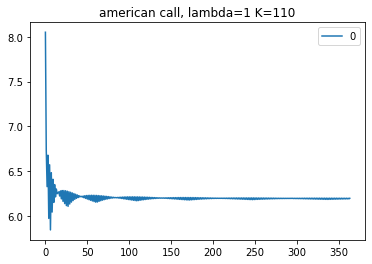

In [125]:
uscall_110=[]
for i in range(1,365):
    uscall_110.append(price_uscall(110,1,i))
df21=pd.DataFrame(uscall_110)
df21.plot()
plt.title('american call, lambda=1 K=110')

Text(0.5, 1.0, 'american call,lambda=1.1  K=70')

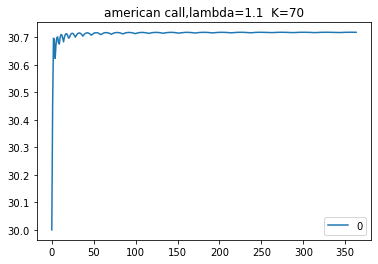

In [126]:
uscall_70_lam=[]

for i in range(1,365):
    uscall_70_lam.append(price_uscall(70,1.1,i))
df2021=pd.DataFrame(uscall_70_lam)
df2021.plot()

plt.title('american call,lambda=1.1  K=70')

Text(0.5, 1.0, 'american call,lambda=1.1  K=80')

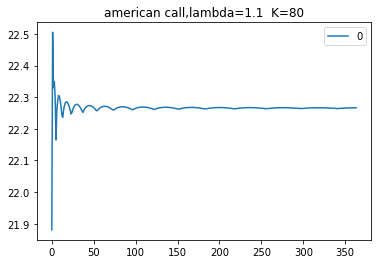

In [127]:
uscall_80_lam=[]

for i in range(1,365):
    uscall_80_lam.append(price_uscall(80,1.1,i))
df2021=pd.DataFrame(uscall_80_lam)
df2021.plot()

plt.title('american call,lambda=1.1  K=80')

Text(0.5, 1.0, 'american call,lambda=1.1  K=100')

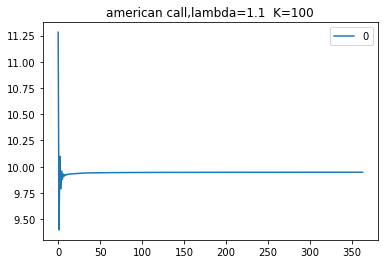

In [146]:
#######################
uscall_100_lam=[]
for i in range(1,365):
    uscall_100_lam.append(price_uscall(100,1.1,i))
df22=pd.DataFrame(uscall_100_lam)
df22.plot()
plt.title('american call,lambda=1.1  K=100')

Text(0.5, 1.0, 'american call,lambda=1.1  K=110')

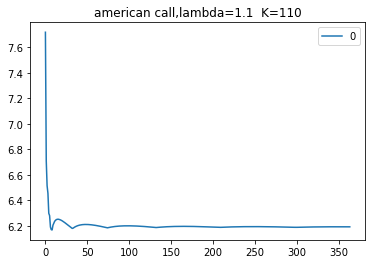

In [129]:
#######################
uscall_110_lam=[]
for i in range(1,365):
    uscall_110_lam.append(price_uscall(110,1.1,i))
df23=pd.DataFrame(uscall_110_lam)
df23.plot()
plt.title('american call,lambda=1.1  K=110')

Text(0.5, 1.0, 'american call,lambda=4  K=70')

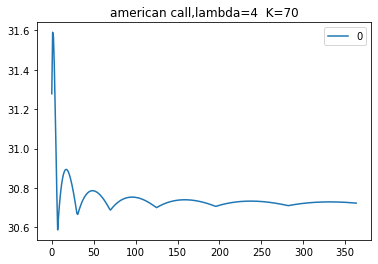

In [130]:
uscall_70_lam1=[]
for i in range(1,365):
    uscall_70_lam1.append(price_uscall(70,4,i))
df23=pd.DataFrame(uscall_70_lam1)
df23.plot()
plt.title('american call,lambda=4  K=70')

Text(0.5, 1.0, 'american call,lambda=4  K=80')

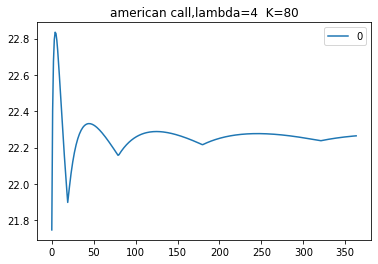

In [131]:
uscall_80_lam1=[]
for i in range(1,365):
    uscall_80_lam1.append(price_uscall(80,4,i))
df23=pd.DataFrame(uscall_80_lam1)
df23.plot()
plt.title('american call,lambda=4  K=80')

Text(0.5, 1.0, 'american call,lambda=4  K=100')

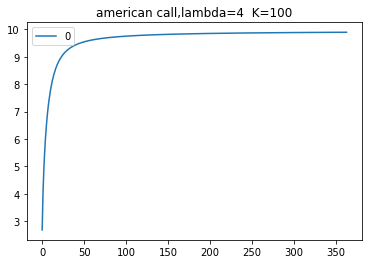

In [132]:
uscall_100_lam1=[]
for i in range(1,365):
    uscall_100_lam1.append(price_uscall(100,4,i))
df23=pd.DataFrame(uscall_100_lam1)
df23.plot()
plt.title('american call,lambda=4  K=100')

Text(0.5, 1.0, 'american call,lambda=4  K=110')

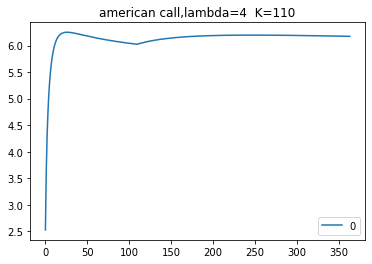

In [133]:
uscall_110_lam1=[]
for i in range(1,365):
    uscall_110_lam1.append(price_uscall(110,4,i))
df23=pd.DataFrame(uscall_110_lam1)
df23.plot()
plt.title('american call,lambda=4  K=110')

In [81]:
def price_putus(K,lam,g=1,s=100,r=0,sigma=0.25,t=1):
    for n in range(1):#range has to be of one number
        
        a=[]
        fin_val_call=[]
        fin_val=[]
        interm=[]
        #prezzo=0
        taue=t/g
        mu=r-(sigma**2)/2
        #x>sigma*np.sqrt(tau)
        #print(tau)
        S=np.zeros((g+1,2*g+1))
        V=np.zeros((g+1,2*g+1))
        S[0,0]=s
        for i in range(1,g+1):
            for k in range(0,2*i+1):
                if k==0:
                    S[i,k]=S[i-1,k]*np.exp(lam*sigma*np.sqrt(taue))
                    #print(S[i,k])
                elif k==1:
                    S[i,k]=S[i-1,k-1]*np.exp(0)
                elif k==2:
                    S[i,k]=S[i-1,k-2]*np.exp(-lam*sigma*np.sqrt(taue))
                else:
                    S[i,k]=S[i-1,k-2]*np.exp(-lam*sigma*np.sqrt(taue))
        #print(S)
        #for i in range(1,g+1):
        for k in range(0,2*g+1):
            V[-1,k]=K-S[-1,k]
            if V[-1,k]<0:
                V[-1,k]=0
        #print(V)
      
        
        #print(fin_val)
        qu=(1/(2*(lam**2)))+(((r-0.5*sigma**2)/(2*lam*sigma))*np.sqrt(taue))
        qd=(1/(2*(lam**2)))-(((r-0.5*sigma**2)/(2*lam*sigma))*np.sqrt(taue))
        qm=1-(1/lam**2)
        nn=g
        #print(qu)
        #print(nn)
        for i in range (g):
            for k in range (2*(g-i)-1):
                V[g-i-1,k]=qu*V[g-i,k]+qm*V[g-i,k+1]+qd*V[g-i,k+2]
                if K-S[g-i-1,k] >V[g-i-1,k]:
                    V[g-i-1,k]=K-S[g-i-1,k]
                    
                
        #print(V)
        
    return (V[0,0])           
    #return(abs(prezzo))


Text(0.5, 1.0, 'american put, lambda=1  K=70')

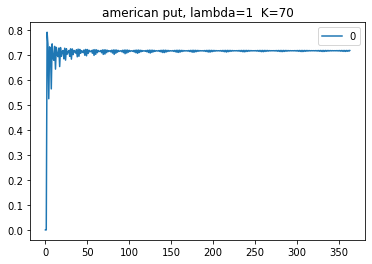

In [134]:
usput_70=[]
for i in range(1,365):
    usput_70.append(price_putus(70,1,i))
df213=pd.DataFrame(usput_70)
df213.plot()
plt.title('american put, lambda=1  K=70')

Text(0.5, 1.0, 'american put, lambda=1  K=80')

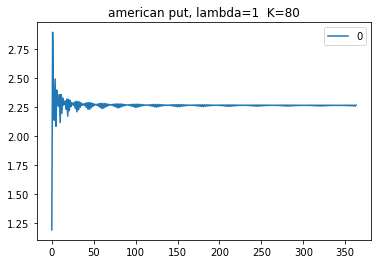

In [135]:
usput_80=[]
for i in range(1,365):
    usput_80.append(price_putus(80,1,i))
df214=pd.DataFrame(usput_80)
df214.plot()
plt.title('american put, lambda=1  K=80')

Text(0.5, 1.0, 'american put,lambda=1  K=100')

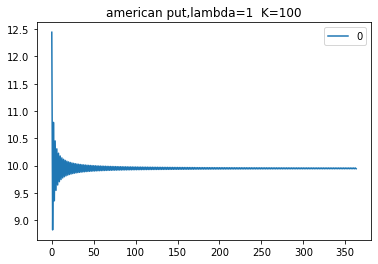

In [136]:
usput_100=[]
for i in range(1,365):
    usput_100.append(price_putus(100,1,i))
df2188=pd.DataFrame(usput_100)
df2188.plot()
plt.title('american put,lambda=1  K=100')

Text(0.5, 1.0, 'american put, lamda=1  K=110')

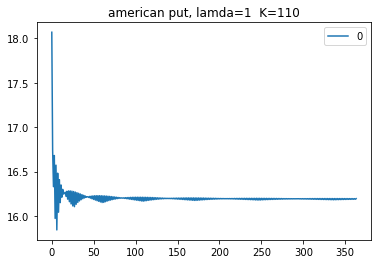

In [137]:
usput_110=[]
for i in range(1,365):
    usput_110.append(price_putus(110,1,i))
df2123=pd.DataFrame(usput_110)
df2123.plot()
plt.title('american put, lamda=1  K=110')

Text(0.5, 1.0, 'american put, lambda=1.1 K=70')

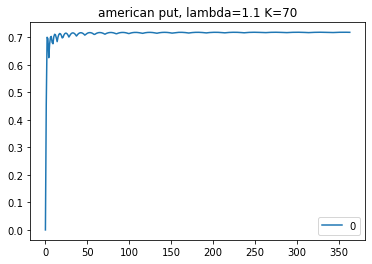

In [138]:
usput_701=[]
for i in range(1,365):
    usput_701.append(price_putus(70,1.1,i))
df2199=pd.DataFrame(usput_701)
df2199.plot()
plt.title('american put, lambda=1.1 K=70')

Text(0.5, 1.0, 'american put, lambda=1.1  K=80')

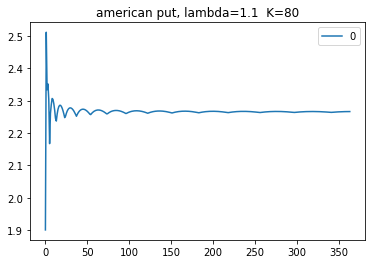

In [139]:
usput_801=[]
for i in range(1,365):
    usput_801.append(price_putus(80,1.1,i))
df219=pd.DataFrame(usput_801)
df219.plot()
plt.title('american put, lambda=1.1  K=80')

Text(0.5, 1.0, 'american put, lambda=1.1  K=100')

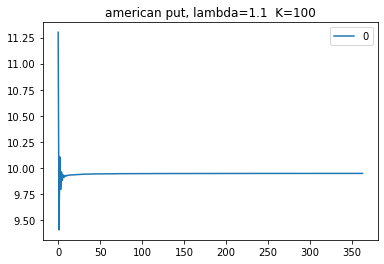

In [140]:
usput_1001=[]
for i in range(1,365):
    usput_1001.append(price_putus(100,1.1,i))
df219=pd.DataFrame(usput_1001)
df219.plot()
plt.title('american put, lambda=1.1  K=100')

Text(0.5, 1.0, 'american put, lambda=1.1  K=110')

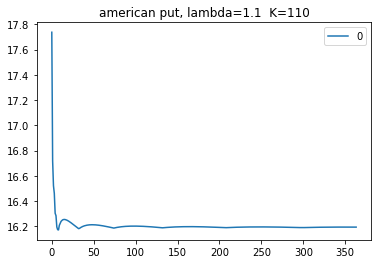

In [141]:
usput_1101=[]
for i in range(1,365):
    usput_1101.append(price_putus(110,1.1,i))
df219=pd.DataFrame(usput_1101)
df219.plot()
plt.title('american put, lambda=1.1  K=110')

Text(0.5, 1.0, 'american put, lambda=4  K=70')

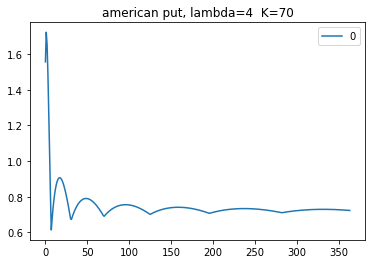

In [142]:
usput_702=[]
for i in range(1,365):
    usput_702.append(price_putus(70,4,i))
df21992=pd.DataFrame(usput_702)
df21992.plot()
plt.title('american put, lambda=4  K=70')

Text(0.5, 1.0, 'american put, lambda=4  K=80')

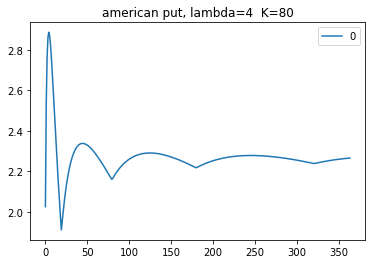

In [143]:
usput_802=[]
for i in range(1,365):
    usput_802.append(price_putus(80,4,i))
df21992=pd.DataFrame(usput_802)
df21992.plot()
plt.title('american put, lambda=4  K=80')

Text(0.5, 1.0, 'american put, lambda=4  K=100')

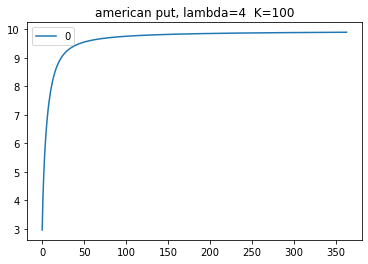

In [144]:
usput_1002=[]
for i in range(1,365):
    usput_1002.append(price_putus(100,4,i))
df21992=pd.DataFrame(usput_1002)
df21992.plot()
plt.title('american put, lambda=4  K=100')

Text(0.5, 1.0, 'american put, lambda=4  K=110')

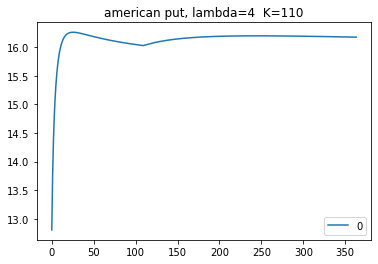

In [145]:
usput_1102=[]
for i in range(1,365):
    usput_1102.append(price_putus(110,4,i))
df21992=pd.DataFrame(usput_1102)
df21992.plot()
plt.title('american put, lambda=4  K=110')

The results found with the europeans options are confirmed by the american ones. if lambda=1 the is a binomial model, a slightly higher Lambda than 1 improves the model but a much bigger one will have the opposite effect